## Exploratory Data Analysis

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

In [43]:
data = pd.read_csv('Airline_Delay_Cause.csv')

In [44]:
data.shape

(171666, 21)

In [45]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [46]:
data.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.0,...,0.0,0.0,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.0,...,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.0,...,0.0,0.0,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0
171665,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

### Column meanings taken from metadata tag
- year - The year of the data.
- month - The month of the data.
- carrier - Carrier code.
- carrier_name - Carrier name.
- airport - Airport code.
- airport_name - Airport name
- arr_flights - Number of arriving flights
- arr_del15 - Number of flights delayed by 15 minutes or more
- carrier_ct - Carrier count (delay due to the carrier).
- weather_ct - Weather count (delay due to weather).
- nas_ct - NAS (National Airspace System) count (delay due to the NAS)
- security_ct - Security count (delay due to security)
- late_aircraft_ct - Late aircraft count (delay due to late aircraft arrival)
- arr_cancelled - Number of flights canceled
- arr_diverted - Number of flights diverted
- arr_delay - Total arrival delay
- carrier_delay - Delay attributed to the carrier
- weather_delay - Delay attributed to weathe
- nas_delay - Delay attributed to the NAS
- security_delay - Delay attributed to security.
- late_aircraft_delay - Delay attributed to late aircraft arrival.

In [48]:
# Check for missing values
print(data.isnull().sum())

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64


In [49]:
# Print out carrier names.
print(data['carrier_name'].value_counts())

carrier_name
SkyWest Airlines Inc.           25593
Delta Air Lines Inc.            16725
Envoy Air                       11886
American Airlines Inc.          11816
United Air Lines Inc.           11262
Southwest Airlines Co.          11109
ExpressJet Airlines Inc.        10147
Frontier Airlines Inc.           9105
Alaska Airlines Inc.             8367
Allegiant Air                    8280
Endeavor Air Inc.                7593
JetBlue Airways                  7552
Mesa Airlines Inc.               6378
PSA Airlines Inc.                6190
Republic Airline                 5727
Spirit Air Lines                 4698
Hawaiian Airlines Inc.           2157
US Airways Inc.                  1708
ExpressJet Airlines LLC          1436
Horizon Air                      1157
Virgin America                   1135
American Eagle Airlines Inc.     1045
AirTran Airways Corporation       600
Name: count, dtype: int64


In [50]:
print(data['airport'].value_counts())

airport
DTW    1535
AUS    1529
MSY    1517
RDU    1515
PIT    1510
       ... 
FNL       1
TKI       1
ENV       1
EFD       1
MCN       1
Name: count, Length: 395, dtype: int64


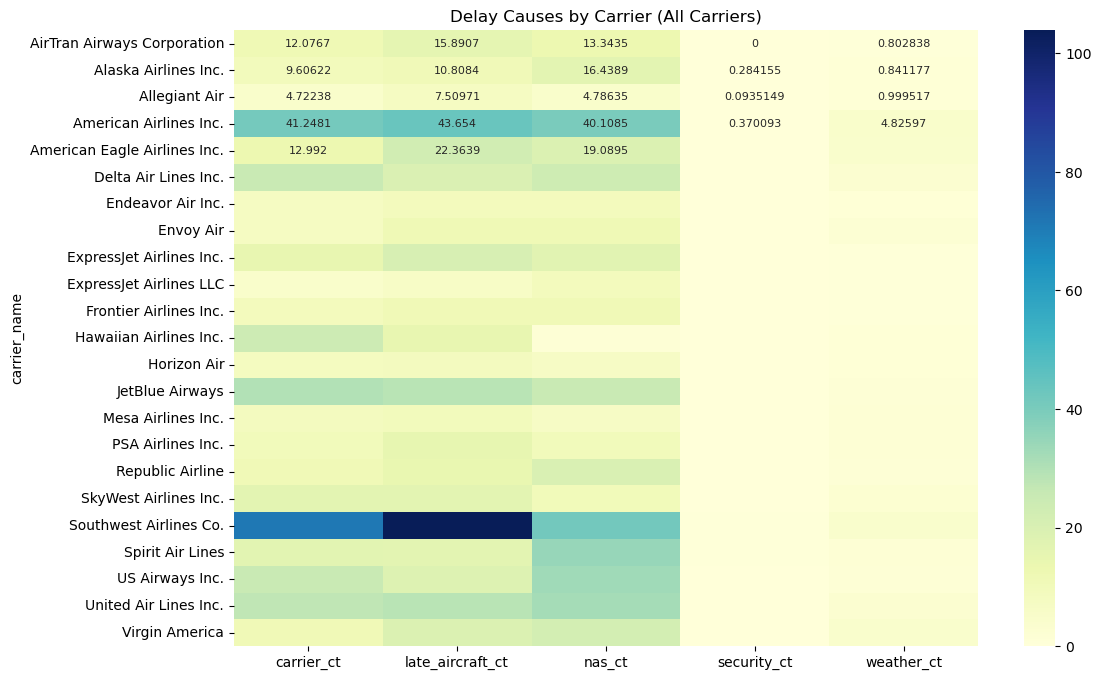

In [51]:
heatmap_data = data[['carrier_name', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

heatmap_matrix = heatmap_data.pivot_table(index='carrier_name', values=['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'])

heatmap_matrix = heatmap_matrix.fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, annot=True, fmt="g", cmap="YlGnBu", annot_kws={"size": 8})
plt.title('Delay Causes by Carrier (All Carriers)')
plt.show()

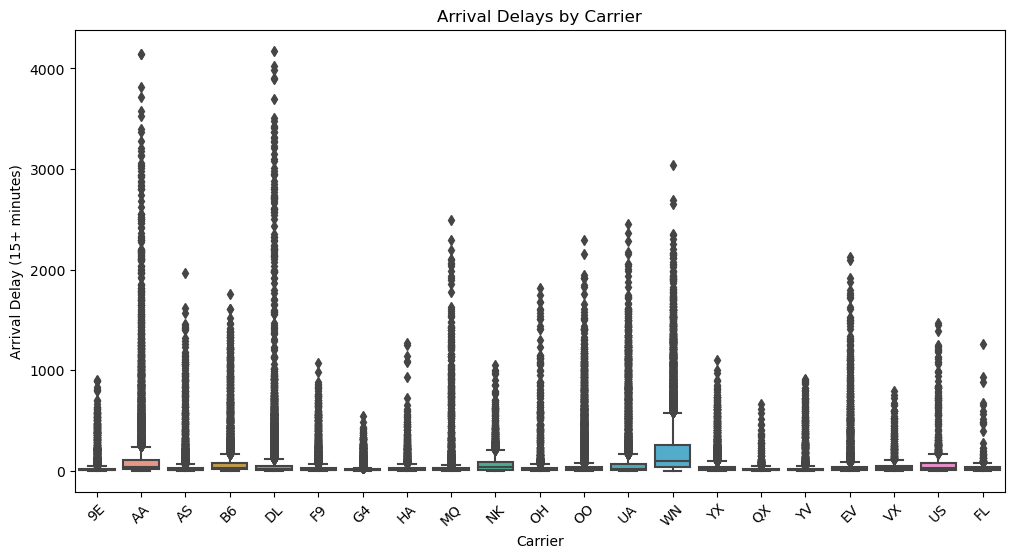

In [52]:
# Box plot of arrival delays by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier', y='arr_del15', data=data)
plt.title('Arrival Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (15+ minutes)')
plt.xticks(rotation=45)
plt.show()

c:\Users\wyatt\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


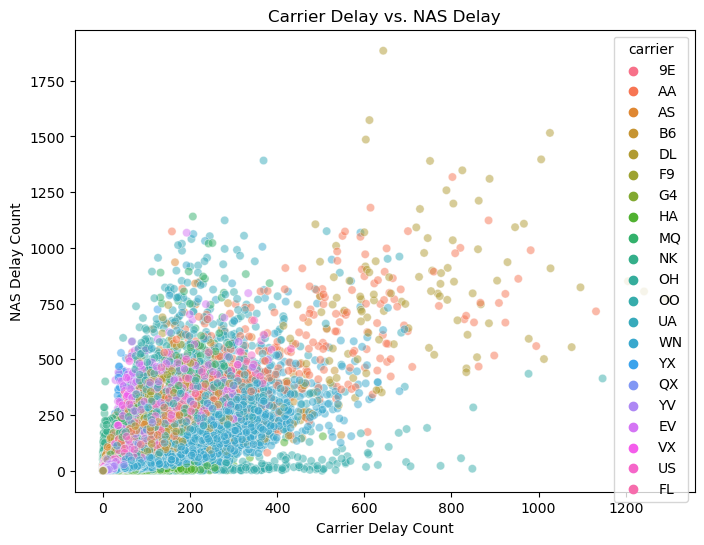

In [53]:
# Scatter plot of carrier delay vs. NAS delay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carrier_ct', y='nas_ct', data=data, hue='carrier', alpha=0.5) # Add hue for carrier differentiation
plt.title('Carrier Delay vs. NAS Delay')
plt.xlabel('Carrier Delay Count')
plt.ylabel('NAS Delay Count')
plt.show()

In [54]:
combined_data = data.groupby(['year', 'month', 'airport'])[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum().reset_index()
combined_data.head()

,year,month,airport,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,2013,8,ABE,24.89,0.00,8.47,0.00,18.63
1,2013,8,ABI,33.25,5.26,10.21,0.00,18.28
2,2013,8,ABQ,224.08,10.25,93.09,1.15,267.44
3,2013,8,ABR,3.74,0.00,0.28,0.00,0.98
4,2013,8,ABY,6.66,0.29,5.59,0.00,7.46


In [55]:
# Unique Values
 
unique_airports = data['airport'].unique()
print("Unique Airports:")
print(unique_airports)
print("\nTotal number of unique airports:", len(unique_airports))
 
unique_airlines = data['carrier'].unique()
print("\nUnique Airlines:")
print(unique_airlines)
print("\nTotal number of unique airlines:", len(unique_airlines))

Unique Airports:
['ABE' 'ABY' 'AEX' 'AGS' 'ALB' 'ATL' 'AUS' 'AVL' 'AZO' 'BDL' 'BGM' 'BGR'
 'BHM' 'BNA' 'BQK' 'BTV' 'BUF' 'BWI' 'CAE' 'CHA' 'CHO' 'CHS' 'CLE' 'CLT'
 'CMH' 'CRW' 'CSG' 'CVG' 'CWA' 'DAY' 'DCA' 'DHN' 'DLH' 'DSM' 'DTW' 'EVV'
 'EWR' 'FAR' 'FAY' 'FSD' 'GFK' 'GRR' 'GSO' 'GSP' 'GTR' 'IAD' 'ILM' 'IND'
 'ITH' 'JAX' 'JFK' 'LAN' 'LEX' 'LFT' 'LGA' 'LIT' 'MBS' 'MCI' 'MEM' 'MGM'
 'MKE' 'MLI' 'MLU' 'MOB' 'MQT' 'MSN' 'MSP' 'MYR' 'OAJ' 'OMA' 'ORF' 'ORH'
 'PIT' 'PVD' 'PWM' 'RAP' 'RDU' 'RIC' 'ROA' 'ROC' 'RST' 'SAV' 'SDF' 'SHV'
 'STL' 'SYR' 'TLH' 'TRI' 'TVC' 'TYS' 'VLD' 'XNA' 'ABQ' 'AMA' 'ANC' 'AVP'
 'BFL' 'BOI' 'BOS' 'BUR' 'BZN' 'CID' 'COS' 'DAB' 'DEN' 'DFW' 'DRO' 'ECP'
 'EGE' 'ELP' 'EUG' 'EYW' 'FAT' 'FCA' 'FLL' 'GEG' 'HNL' 'HSV' 'IAH' 'ICT'
 'JAC' 'KOA' 'LAS' 'LAX' 'LBB' 'LIH' 'MCO' 'MDT' 'MFE' 'MHT' 'MIA' 'MRY'
 'MSO' 'MSY' 'MTJ' 'OGG' 'OKC' 'ONT' 'ORD' 'PBI' 'PDX' 'PHL' 'PHX' 'PNS'
 'PSP' 'RNO' 'RSW' 'SAN' 'SAT' 'SBA' 'SBP' 'SEA' 'SFO' 'SJC' 'SJU' 'SLC'
 'SMF' 'SNA' 'SRQ' 'STT' 'STX' 'TP

In [56]:
# Data cleaning
cleaned_data = data.copy()

cleaned_data['carrier_name'].fillna('Unknown', inplace=True)
cleaned_data['airport_name'].fillna('Unknown', inplace=True)

numeric_columns = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

for column in numeric_columns:
    cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)

In [57]:
print(cleaned_data.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [58]:
# Statistical Analysis
cleaned_data_copy = cleaned_data.copy()

selected_columns = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'arr_cancelled', 'arr_delay']
summary_stats = cleaned_data_copy[selected_columns].describe()

print(summary_stats)

           arr_del15     carrier_ct     weather_ct         nas_ct  \
count  171666.000000  171666.000000  171666.000000  171666.000000   
mean       66.306817      20.776488       2.247760      19.359517   
std       179.326421      50.282869       7.309464      61.634827   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       2.160000       0.000000       1.000000   
50%        17.000000       6.400000       0.400000       3.910000   
75%        47.000000      17.220000       1.860000      11.680000   
max      4176.000000    1293.910000     266.420000    1884.420000   

       arr_cancelled      arr_delay  
count  171666.000000  171666.000000  
mean        7.521367    4234.983485  
std        43.625035   12610.316632  
min         0.000000       0.000000  
25%         0.000000     335.000000  
50%         1.000000    1018.000000  
75%         4.000000    2879.000000  
max      4951.000000  438783.000000  


<Figure size 1200x800 with 0 Axes>

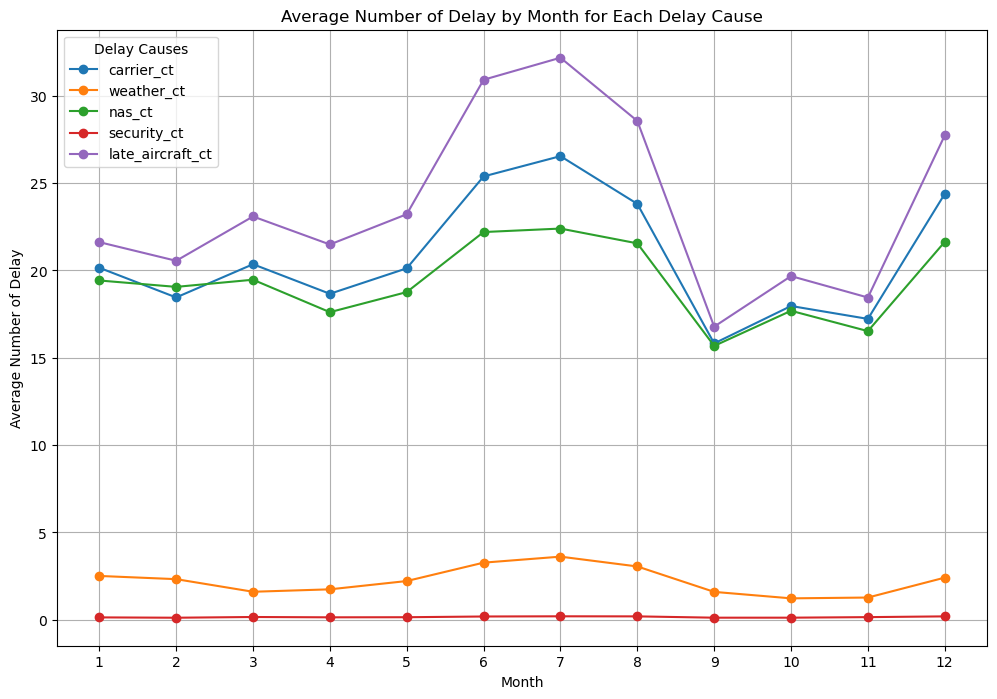

In [59]:
# Data Visualization
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
graph_data = cleaned_data.groupby('month')[delay_causes].mean()

plt.figure(figsize=(12, 8))
graph_data.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Average Number of Delay by Month for Each Delay Cause')
plt.xlabel('Month')
plt.ylabel('Average Number of Delay')
plt.xticks(range(1, 13))
plt.legend(title="Delay Causes")
plt.grid()
plt.show()

In [60]:
airlines_base_airports = {
    'AS': 'SEA',
    'DL': 'ATL',
    'AA': 'DFW',
    'UA': 'ORD'
}

# Prepare data for each carrier separately
carrier_data = []
for code in airlines_base_airports.keys():
    carrier_data.append(carrier_delays_base[carrier_delays_base['carrier'] == code]['carrier_ct'])

plt.figure(figsize=(10, 6))
plt.boxplot(carrier_data, labels=airlines_base_airports.keys())
plt.title('Carrier Delay Distribution for Airlines at Their Base Airports')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Carrier Delays')
plt.show()

NameError: name 'carrier_delays_base' is not defined

## In Depth Analysis

In [61]:
data_al = data[data['carrier'].isin(['DL','AA','UA','WN','AS','B6',])]

In [62]:
data_al.shape

(66831, 21)

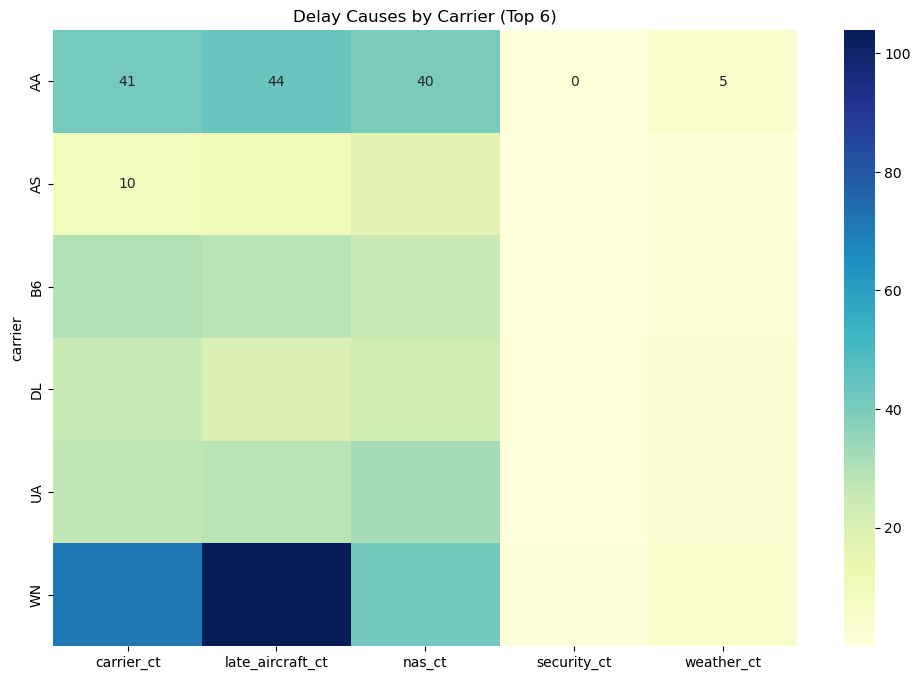

In [63]:
heatmap_data = data_al[['carrier', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

heatmap_matrix = heatmap_data.pivot_table(index='carrier', values=['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'])

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_matrix, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Delay Causes by Carrier (Top 6)')
plt.show()

In [64]:
data_al_airports = data_al['airport'].value_counts().nlargest(50).index
data_al_ap = data_al[data_al['airport'].isin(data_al_airports)]
print(data_al_ap['airport'].value_counts())

airport
DCA    726
FLL    726
AUS    726
BOS    726
LAX    726
LAS    726
SFO    726
SEA    726
SAN    726
MCO    726
DEN    726
PHX    726
PHL    724
SLC    721
PDX    721
SMF    719
TPA    716
MSY    715
SJC    708
DTW    703
RDU    700
BWI    687
ATL    683
ABQ    681
EWR    681
MSP    667
PIT    664
IAD    651
BNA    646
CHS    641
ORD    635
RSW    633
SAT    628
MCI    621
RNO    619
PBI    605
SJU    605
DFW    604
BDL    604
ONT    603
SNA    603
LGA    602
CLE    600
CLT    598
RIC    596
JAX    588
STL    586
GEG    581
OMA    566
BUF    565
Name: count, dtype: int64


c:\Users\wyatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


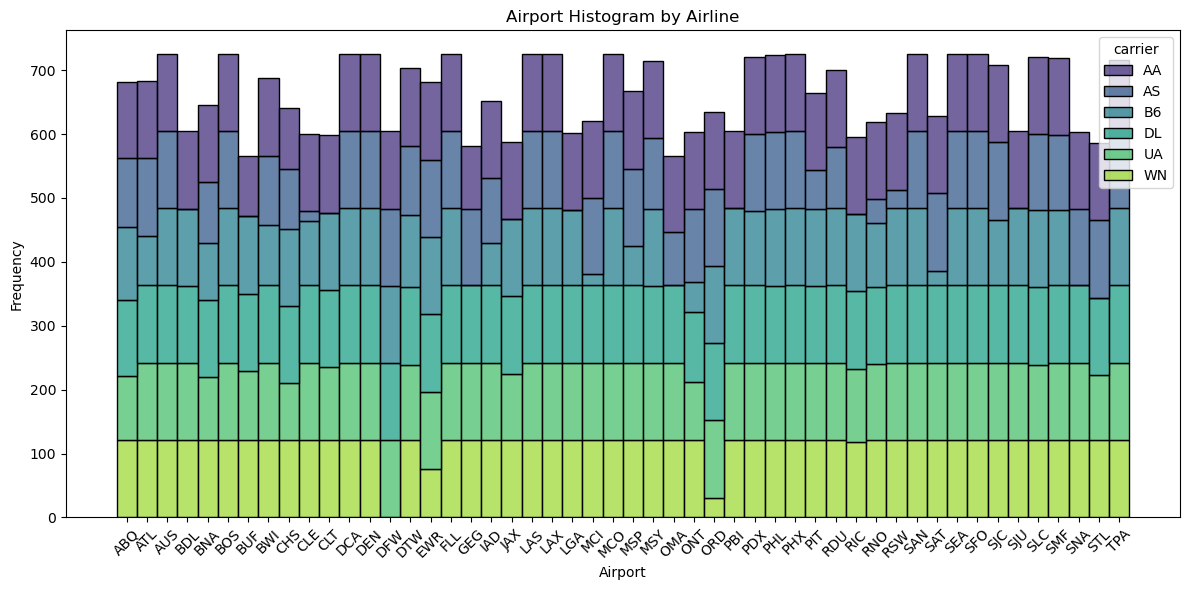

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_al_ap, x='airport', hue='carrier', multiple="stack", palette="viridis", bins=30) # Use a more distinct palette
plt.title('Airport Histogram by Airline')
plt.xlabel('Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [66]:
data_al_ap.shape

(33182, 21)

In [67]:
data_al_ap['month'] = pd.to_numeric(data_al_ap['month'], errors='coerce')
data_al_ap['year'] = pd.to_numeric(data_al_ap['year'], errors='coerce')

data_al_ap['date'] = pd.to_datetime(data_al_ap[['year', 'month']].assign(day=1))

holiday_months = [11, 12, 1]  # November, December, January

data_holiday = data_al_ap[data_al_ap['month'].isin(holiday_months)]
data_holiday.shape

C:\Users\wyatt\AppData\Local\Temp\ipykernel_39620\4241335112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_al_ap['month'] = pd.to_numeric(data_al_ap['month'], errors='coerce')
C:\Users\wyatt\AppData\Local\Temp\ipykernel_39620\4241335112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_al_ap['year'] = pd.to_numeric(data_al_ap['year'], errors='coerce')
C:\Users\wyatt\AppData\Local\Temp\ipykernel_39620\4241335112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

(8237, 22)

c:\Users\wyatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


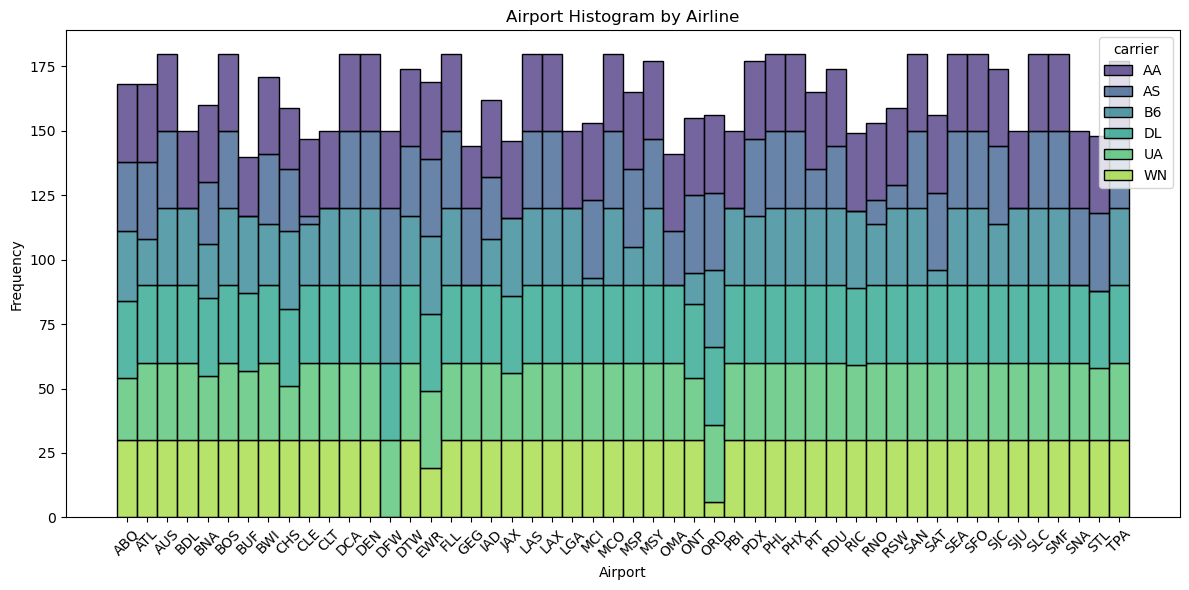

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_holiday, x='airport', hue='carrier', multiple="stack", palette="viridis", bins=30) # Use a more distinct palette
plt.title('Airport Histogram by Airline')
plt.xlabel('Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

C:\Users\wyatt\AppData\Local\Temp\ipykernel_39620\3237576957.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_holiday['cluster'] = kmeans.fit_predict(X_scaled)


          arr_flights    arr_del15  carrier_ct  weather_ct      nas_ct  \
cluster                                                                  
0        12793.162162  2076.459459  574.752838   65.639595  654.532297   
1          458.120186    80.097378   28.896221    2.263642   23.098042   
2         3666.690107   667.163290  199.030226   14.281049  206.464636   

         security_ct  late_aircraft_ct  
cluster                                 
0           4.154595        777.380541  
1           0.178515         25.661015  
2           1.794303        245.593111  


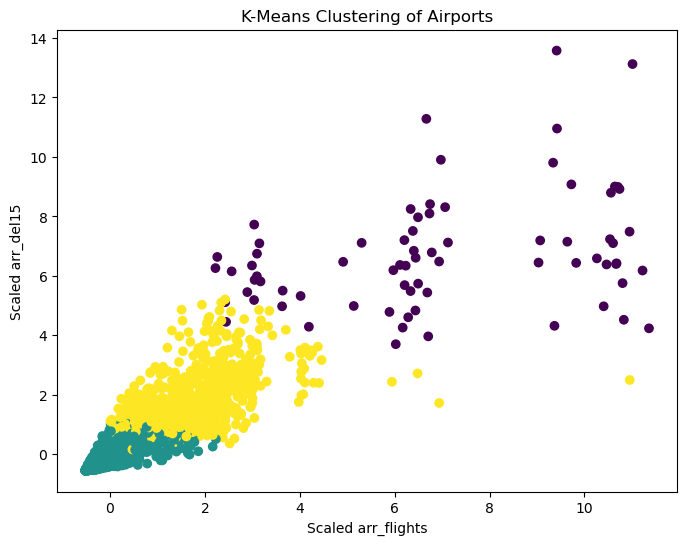


Analysis for Cluster 0:
              year      month   arr_flights    arr_del15   carrier_ct  \
count    74.000000  74.000000     74.000000    74.000000    74.000000   
mean   2017.905405   8.500000  12793.162162  2076.459459   574.752838   
min    2013.000000   1.000000   4713.000000  1211.000000   301.290000   
25%    2015.000000   1.000000   9434.250000  1712.500000   498.302500   
50%    2018.000000  11.000000  12052.000000  1988.000000   542.530000   
75%    2021.000000  12.000000  17568.000000  2271.000000   635.370000   
max    2023.000000  12.000000  20416.000000  4024.000000  1005.960000   
std       3.335853   4.927557   4918.980282   556.032871   143.287860   

       weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count   74.000000    74.000000    74.000000         74.000000      74.000000   
mean    65.639595   654.532297     4.154595        777.380541     203.486486   
min     13.030000   173.740000     0.000000        199.070000       0.000000 

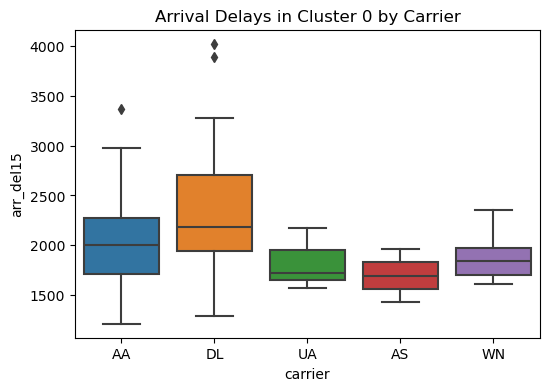


Analysis for Cluster 1:
              year        month  arr_flights    arr_del15   carrier_ct  \
count  7324.000000  7324.000000  7322.000000  7322.000000  7322.000000   
mean   2017.914664     7.983342   458.120186    80.097378    28.896221   
min    2013.000000     1.000000     1.000000     0.000000     0.000000   
25%    2015.000000     1.000000   126.000000    20.000000     7.880000   
50%    2018.000000    11.000000   304.000000    51.000000    19.935000   
75%    2020.000000    12.000000   597.000000   111.000000    40.790000   
max    2023.000000    12.000000  4727.000000   484.000000   200.970000   
std       2.881748     4.965207   496.074803    82.651266    28.379343   

        weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  7322.000000  7322.000000  7322.000000       7322.000000    7322.000000   
mean      2.263642    23.098042     0.178515         25.661015       6.285168   
min       0.000000     0.000000     0.000000          0.000000   

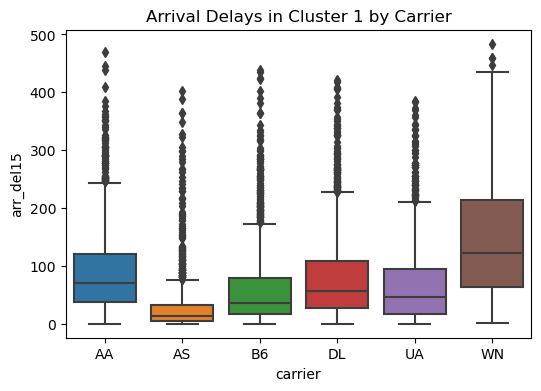


Analysis for Cluster 2:
              year       month   arr_flights    arr_del15  carrier_ct  \
count   839.000000  839.000000    839.000000   839.000000  839.000000   
mean   2017.800954    8.146603   3666.690107   667.163290  199.030226   
min    2013.000000    1.000000    574.000000   155.000000   43.410000   
25%    2015.000000    1.000000   2377.000000   462.000000  145.900000   
50%    2018.000000   11.000000   3484.000000   600.000000  182.930000   
75%    2020.500000   12.000000   4722.000000   814.000000  240.200000   
max    2023.000000   12.000000  19719.000000  1640.000000  521.330000   
std       2.960713    4.969473   1704.954097   270.332622   76.174172   

       weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  839.000000   839.000000   839.000000        839.000000     839.000000   
mean    14.281049   206.464636     1.794303        245.593111      61.451728   
min      0.000000    21.110000     0.000000         20.830000       0.000000 

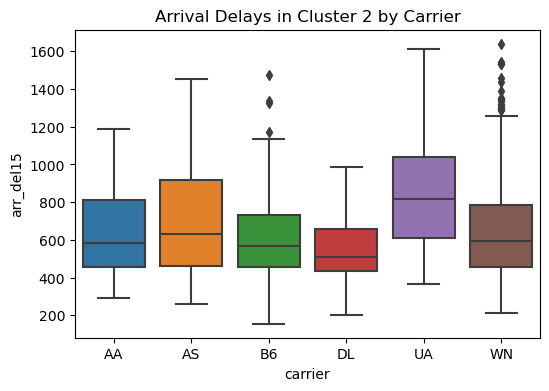

In [69]:

features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = data_holiday[features]

imputer = SimpleImputer(strategy='mean') 
X = imputer.fit_transform(X) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with 3 clusters
data_holiday['cluster'] = kmeans.fit_predict(X_scaled)

print(data_holiday.groupby('cluster')[features].mean())

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_holiday['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Airports')
plt.xlabel('Scaled arr_flights') 
plt.ylabel('Scaled arr_del15') 
plt.show()

for cluster_num in range(3):  # Assuming 3 clusters
  print(f"\nAnalysis for Cluster {cluster_num}:")
  cluster_data = data_holiday[data_holiday['cluster'] == cluster_num]
  print(cluster_data.describe())  # Summary statistics for the cluster
  print(cluster_data['carrier'].value_counts())  # Carrier distribution within the cluster
  print(cluster_data['airport'].value_counts())  # Airport distribution within the cluster

  plt.figure(figsize=(6, 4))
  sns.boxplot(x='carrier', y='arr_del15', data=cluster_data)
  plt.title(f"Arrival Delays in Cluster {cluster_num} by Carrier")
  plt.show()

In [70]:
# Descriptive statistics of relevant features
features_of_interest = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_delay', 'arr_flights']
 
descriptive_stats = data_holiday[features_of_interest].describe()
print("Descriptive Statistics of Features of Interest:\n", descriptive_stats)


Descriptive Statistics of Features of Interest:
         carrier_ct   weather_ct       nas_ct  security_ct  late_aircraft_ct  \
count  8235.000000  8235.000000  8235.000000  8235.000000       8235.000000   
mean     51.134936     4.057501    47.453926     0.378865         54.823161   
std      81.370910     9.582580   101.599588     1.019354        110.702765   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       9.220000     0.000000     5.425000     0.000000          5.340000   
50%      23.800000     1.220000    14.650000     0.000000         17.550000   
75%      55.425000     3.985000    43.380000     0.090000         48.945000   
max    1005.960000   193.330000  1884.420000    13.060000       1537.660000   

           arr_delay   arr_flights  
count    8235.000000   8235.000000  
mean     9364.580935    895.859502  
std     19155.750085   1718.702986  
min         0.000000      1.000000  
25%      1174.000000    145.000000  
50%      3322.000

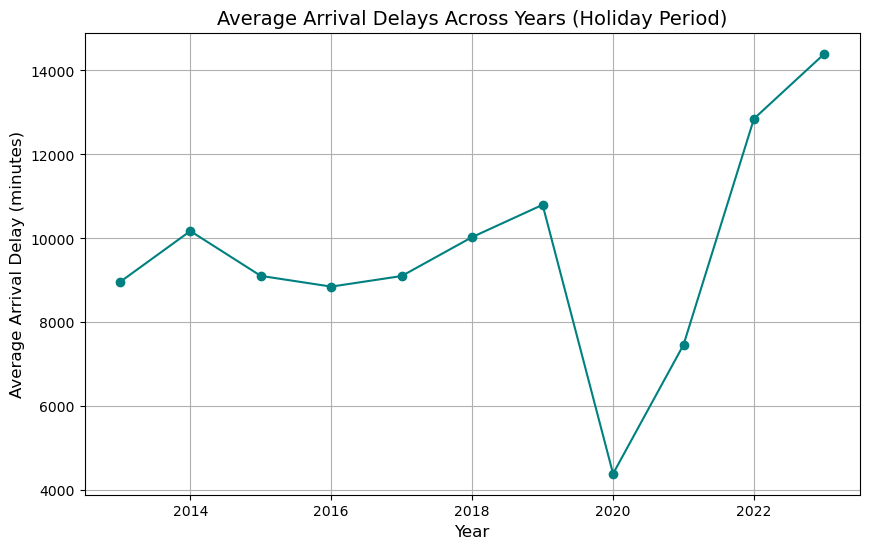

In [71]:
plt.figure(figsize=(10, 6))
data_holiday.groupby('year')['arr_delay'].mean().plot(kind='line', marker='o', color='teal')
plt.title('Average Arrival Delays Across Years (Holiday Period)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.grid()
plt.show()

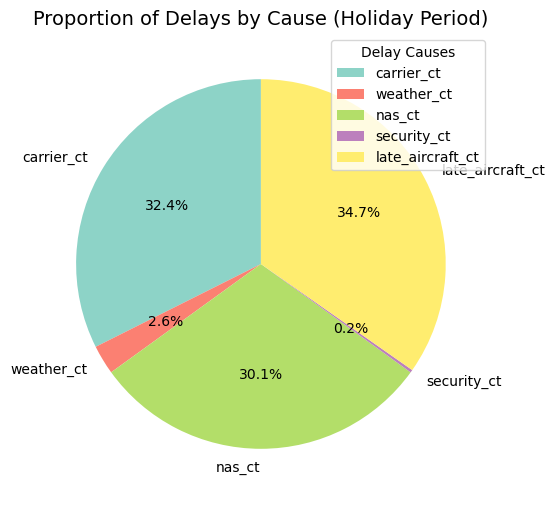

In [ ]:
total_causes = data_holiday[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

plt.figure(figsize=(6, 6))
total_causes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Proportion of Delays by Cause (Holiday Period)', fontsize=14)
plt.ylabel('')
plt.show()

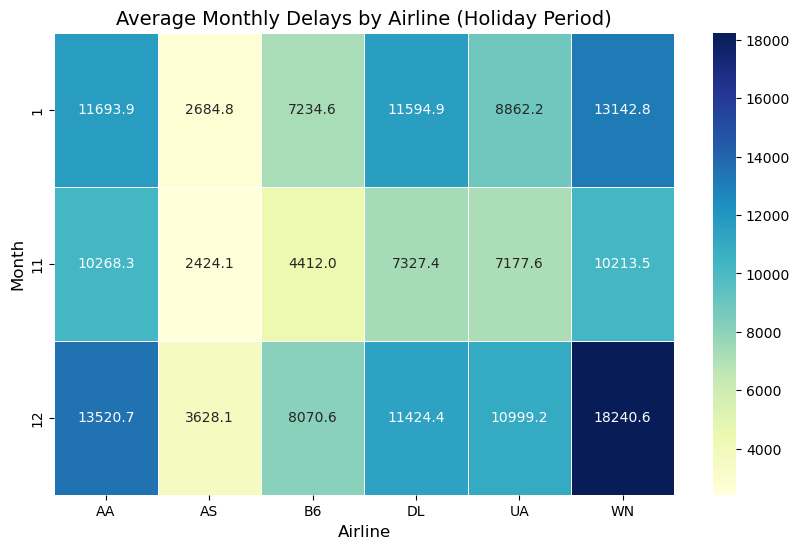

In [ ]:
monthly_delays = data_holiday.pivot_table(index='month', columns='carrier', values='arr_delay', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_delays, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Average Monthly Delays by Airline (Holiday Period)', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

In [ ]:
cause_correlation_matrix = data_holiday[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].corr()
formatted_correlation_matrix = cause_correlation_matrix.style.background_gradient(cmap='coolwarm').set_caption("Correlation Between Delay Causes")
formatted_correlation_matrix

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
carrier_ct,1.000000,0.731583,0.802975,0.594324,0.938454
weather_ct,0.731583,1.000000,0.740478,0.308205,0.690840
nas_ct,0.802975,0.740478,1.000000,0.431066,0.768716
security_ct,0.594324,0.308205,0.431066,1.000000,0.584157
late_aircraft_ct,0.938454,0.690840,0.768716,0.584157,1.000000


Mean Delay Causes by Cluster:
          carrier_ct  weather_ct      nas_ct  security_ct  late_aircraft_ct
cluster                                                                   
0         11.776425    1.215847    9.017541     0.074215         11.127667
1        376.697232   49.816545  449.677026     3.067527        557.866010
2        142.017734   14.891908  154.659955     1.338136        187.089243

Percentage Contribution of Delay Causes by Cluster:
          carrier_ct  weather_ct     nas_ct  security_ct  late_aircraft_ct
cluster                                                                  
0         35.458669    3.660900  27.151704     0.223461         33.505267
1         26.211875    3.466405  31.290057     0.213449         38.818215
2         28.403719    2.978400  30.932178     0.267629         37.418075


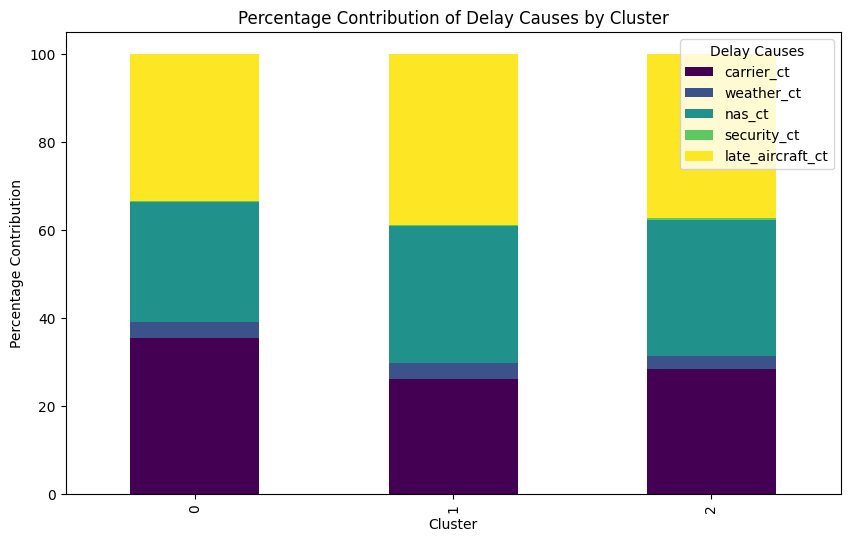


Cluster 0 Analysis:
Top Airports in Cluster:
 airport_name
Pittsburgh, PA: Pittsburgh International                      1510
Raleigh/Durham, NC: Raleigh-Durham International              1508
Cleveland, OH: Cleveland-Hopkins International                1465
New Orleans, LA: Louis Armstrong New Orleans International    1446
Austin, TX: Austin - Bergstrom International                  1423
Name: count, dtype: int64
Top Carriers in Cluster:
 carrier_name
SkyWest Airlines Inc.     24638
Delta Air Lines Inc.      15786
Envoy Air                 11678
American Airlines Inc.    10524
United Air Lines Inc.     10500
Name: count, dtype: int64

Cluster 1 Analysis:
Top Airports in Cluster:
 airport_name
Chicago, IL: Chicago O'Hare International                 187
Dallas/Fort Worth, TX: Dallas/Fort Worth International    165
Atlanta, GA: Hartsfield-Jackson Atlanta International     135
Denver, CO: Denver International                          129
Charlotte, NC: Charlotte Douglas International

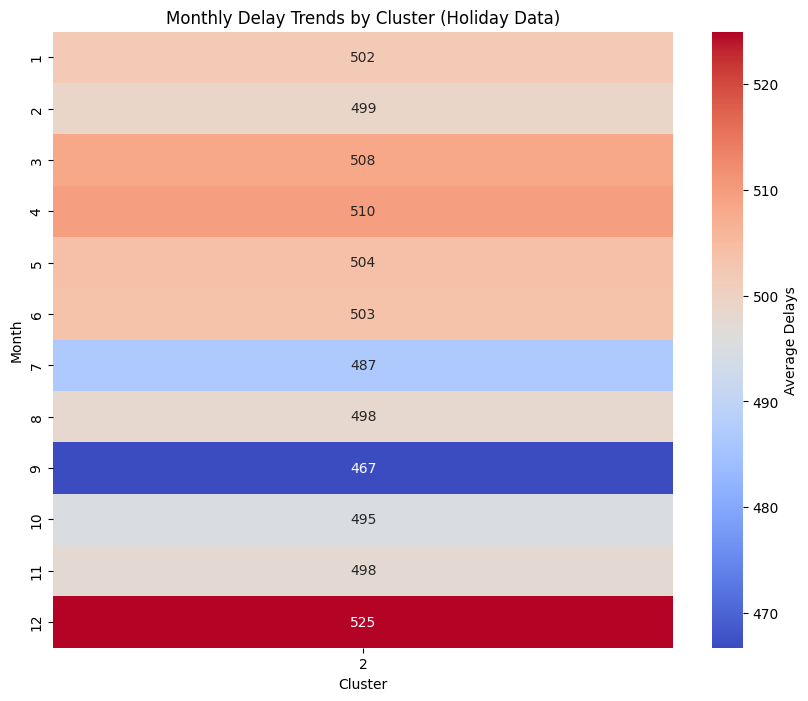

In [ ]:
data = pd.read_csv('Airline_Delay_Cause.csv')

# Clustering
features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = data[features]

# Handle values w/ SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale the data StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
data['cluster'] = kmeans.fit_predict(X_scaled)

# Group by cluster and calculate mean delay causes
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
delay_by_cluster = data.groupby('cluster')[delay_causes].mean()

# Percentage contribution of each delay cause
delay_by_cluster_percentage = delay_by_cluster.div(delay_by_cluster.sum(axis=1), axis=0) * 100

# mean delay causes and percentage contributions
print("Mean Delay Causes by Cluster:\n", delay_by_cluster)
print("\nPercentage Contribution of Delay Causes by Cluster:\n", delay_by_cluster_percentage)

# Plot percentage contribution
delay_by_cluster_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage Contribution of Delay Causes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage Contribution')
plt.legend(title='Delay Causes')
plt.show()

# Analysis for each cluster
for cluster_num in range(3): 
    print(f"\nCluster {cluster_num} Analysis:")
    cluster_data = data[data['cluster'] == cluster_num]
    
    # airport/carrier distributions
    print("Top Airports in Cluster:\n", cluster_data['airport_name'].value_counts().head())
    print("Top Carriers in Cluster:\n", cluster_data['carrier_name'].value_counts().head())
    
# Aggregate av.delays by month and cluster
monthly_trends = cluster_data.groupby(['month', 'cluster'])['arr_del15'].mean().reset_index()

# Pivot data for the heatmap
pivot_table = monthly_trends.pivot(index="month", columns="cluster", values="arr_del15")

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Delays'})
plt.title("Monthly Delay Trends by Cluster (Holiday Data)")
plt.xlabel("Cluster")
plt.ylabel("Month")
plt.show()
